<a href="https://colab.research.google.com/github/kahramankaya/HuggingFace_Models/blob/main/animal_species_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastai duckduckgo_search
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.2 MB/s eta 0:00:00


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [5]:
from fastdownload import download_url
from fastai.vision.all import *

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=10):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [6]:
searches="cat","horse","rabbit"
!mkdir hayvan_tespiti
path=Path("content/hayvan_tespiti")

from time import sleep

for m in searches:
    dest=(path/m)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"{m} photo searching..."))
    sleep(10)



mkdir: cannot create directory ‘hayvan_tespiti’: File exists
Searching for 'cat photo searching...'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'horse photo searching...'
Searching for 'rabbit photo searching...'


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

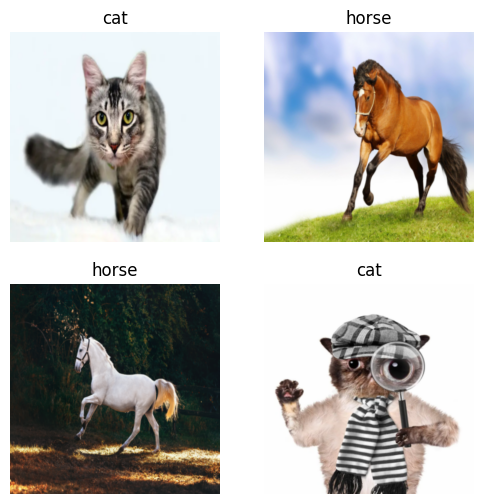

In [10]:
trn_path = Path('content/hayvan_tespiti')
dls = ImageDataLoaders.from_folder(
    trn_path, valid_pct=0.2, seed=42,
    item_tfms=[Resize(384, method='squish')],
    batch_tfms=aug_transforms(mult=0.1, do_flip=True),
    bs=4
)

dls.show_batch(max_n=25)

In [11]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 160MB/s]


SuggestedLRs(valley=0.0010000000474974513, slide=0.00015848931798245758)

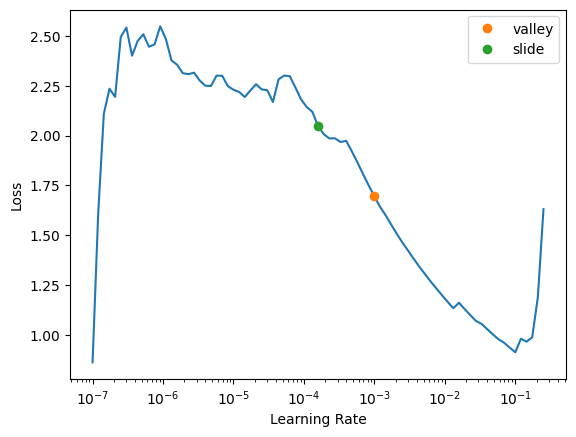

In [12]:
learn.lr_find(suggest_funcs=(valley,slide)) # en ıyı learnıng rate bulmaya yaradı.

In [13]:
learn.fine_tune(10, 0.001)  # burada hata oranının sıfır cıkması gayet normal cunku hayvanlar zaten dırek ayırt edılebılrı bu yuzden zor olmadı hata sıfır olarak verıldı.

epoch,train_loss,valid_loss,error_rate,time
0,1.396313,0.670519,0.400000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.299888,0.218989,0.000000,00:04
1,0.512190,0.079363,0.000000,00:03
2,0.467067,0.039512,0.000000,00:02
3,0.376155,0.013091,0.000000,00:03
4,0.304494,0.004048,0.000000,00:03
5,0.338235,0.002734,0.000000,00:03
6,0.345765,0.002003,0.000000,00:02
7,0.344250,0.002372,0.000000,00:03
8,0.308158,0.001847,0.000000,00:03
9,0.297956,0.002014,0.000000,00:02


In [15]:
def classify_img(path):
    img = PILImage.create(path)
    pred,idx,probs = learn.predict(img)
    return dict(zip(dls.vocab, map(float,probs)))

classify_img("/content/content/hayvan_tespiti/horse/5d5d26f6-cc4d-41b9-a7de-11f857cfdd5a.jpg")

{'cat': 3.914007720595691e-06,
 'horse': 0.9999160766601562,
 'rabbit': 7.993013423401862e-05}

In [19]:
learn.export("animal_species_detection.pkl")